In [2]:
import Ramsey_ExperimentV3

import estimator
import numpy as np

In [2]:
from tqdm import tqdm
import random

shots = 10000
errors_fisher = []
n = 1
delay = np.arange(0,2, 0.1)
repetitions = 1000
Decay = [1]
W = [1]
J = {}
J_list = [random.gauss(1, 0) for _ in range(n - 1)]
errors_local = []

for rep in range(repetitions):
    rep_error_fisher = []
    rep_error_local = []
    rep_error_uniform = []
    for t in tqdm(delay, desc=f"Repetition {rep}"):
        batch_x_det, batch_y_det, batch_x_cross, batch_y_cross = Ramsey_ExperimentV3.ramsey_local(n, shots, [t],
                                                                                                  Decay,
                                                                                                  W, J)

        Decay_local, W_local, J_local = estimator.one_by_one_fit(batch_x_det, batch_y_det, batch_x_cross,
                                                                 batch_y_cross)

        rep_error_local.append(estimator.percent_error(np.concatenate([W, J_list]),
                                                       np.concatenate([W_local, J_local])))

    errors_local.append(rep_error_local)


Repetition 0:   0%|          | 0/20 [00:00<?, ?it/s]C:\Projects\Crosstalk\estimator.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  params, params_covariance, *c = curve_fit(model_func, t_points, z_points, p0=initial_guess, bounds=bounds)
Repetition 999: 100%|██████████| 20/20 [00:00<00:00, 75.66it/s]


In [3]:
errors_local_reshaped = list(map(list, zip(*errors_local)))
errors_local_median,errors_local_std  = estimator.mean_of_medians(errors_local_reshaped, 31)


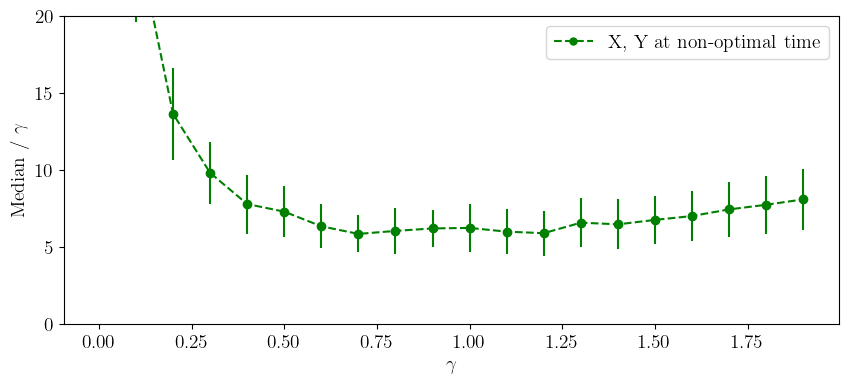

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))  # Adjust the figure size to make the plot longer
plt.rcParams['text.usetex'] = True
font = {'family': 'normal',
        'weight': 'bold',
        'size': 14}

plt.rc('font', **font)
plt.plot(delay, 100 * np.array(errors_local_median ), linestyle='--', marker='o', color='green', markersize=5,
         label='X, Y at non-optimal time')

plt.errorbar(delay, 100 * np.array(errors_local_median ), yerr=100 * np.array(errors_local_std ), fmt='o',
             color='green')

# Scatter points for 75th percentiles



# plt.title(f'Shots={Decay} ')
plt.xlabel('$\gamma$')
plt.ylabel('Median / $\gamma$')
plt.grid()
# plt.yscale('log')
# plt.xscale('log')
# plt.xlim([0, 2.52])
plt.grid()
plt.ylim([0, 20])
plt.legend()

In [1]:
import matplotlib.pyplot as plt
N = 100
t_max = np.pi
samples = 500

sigma_single = 1/np.sqrt(N)
sigma_many = 1/np.sqrt(N/samples)

T = np.linspace(0, t_max, samples)

error_single = []
error_many = []
ratio = []
for t in T:
    I_single = 1/(sigma_single**2) * t**2 * np.exp(-2*t)

    T_many = np.linspace(0, 2*t, samples)
    I_many = 0
    for i in range(samples):
        I_many += 1/(sigma_many**2) * T_many[i]**2 * np.exp(-2*T_many[i])

    error_single.append(1/np.sqrt(I_single))
    error_many.append(1/np.sqrt(I_many))
    ratio.append((1/np.sqrt(I_single))/(1/np.sqrt(I_many)))


plt.plot(T, error_single, label='Single')
plt.plot(T, error_many, label='Many')
# plt.plot(T, ratio, label='Ratio single/many')
# plt.plot(T, np.ones(samples), label='1')
plt.ylim([0,1])
plt.xlabel('t')
plt.ylabel('Error')
plt.legend()

NameError: name 'np' is not defined

C:\Users\user\AppData\Local\Temp\ipykernel_20944\3065851423.py:29: RuntimeWarning: divide by zero encountered in divide
  plt.plot(Gamma, error_single/Gamma, label='Single')
C:\Users\user\AppData\Local\Temp\ipykernel_20944\3065851423.py:30: RuntimeWarning: divide by zero encountered in divide
  plt.plot(Gamma, error_many/Gamma, label='Many')


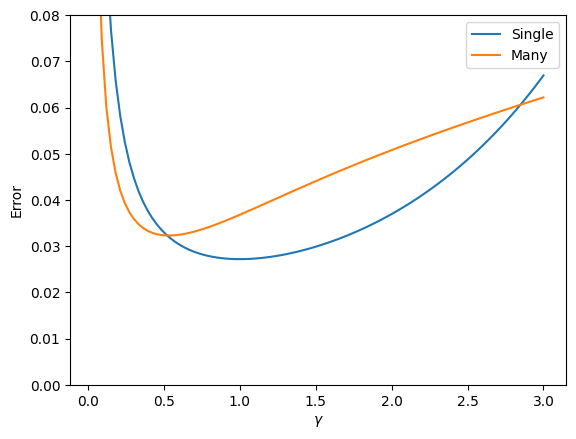

In [6]:
import matplotlib.pyplot as plt
N = 10000
t_max = np.pi
samples = 40

t = 1

sigma_single = 1/np.sqrt(N)
sigma_many = 1/np.sqrt(N/samples)

Gamma = np.linspace(0, 3, 100)

error_single = []
error_many = []
ratio = []
for g in Gamma:
    I_single = 1/(sigma_single**2) * t**2 * np.exp(-2*t*g)

    T_many = np.linspace(0, t_max, samples)
    I_many = 0
    for i in range(samples):
        I_many += 1/(sigma_many**2) * T_many[i]**2 * np.exp(-2*T_many[i]*g)

    error_single.append(1* 1/np.sqrt(I_single))
    error_many.append(1 * 1/np.sqrt(I_many))
    ratio.append((1/np.sqrt(I_single))/(1/np.sqrt(I_many)))


plt.plot(Gamma, error_single/Gamma, label='Single')
plt.plot(Gamma, error_many/Gamma, label='Many')
plt.xlabel('$\gamma$')
plt.ylabel('Error')
# plt.plot(T, ratio, label='Ratio single/many')
# plt.plot(T, np.ones(samples), label='1')
plt.ylim([0,0.08])

plt.legend()